In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("/content/scores_data.csv")

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [10]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [5]:
df.shape

(149, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [8]:
df.columns =df.columns.str.strip()

In [9]:
df['Batch'].value_counts()

,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


In [11]:
df['User_ID'].nunique(), df.shape[0]  #Check Whether User_ID is Unique, If both numbers are same → User IDs are unique.


(149, 149)

In [12]:
df['Score'].min(), df['Score'].max()


('0 / 7', '7 / 7')

In [13]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [14]:
df.duplicated().sum()  #checks for completely duplicate rows in the dataset


np.int64(0)

Output is 0, meaning:
No duplicate rows in dataset, Each (Batch + User_ID + Score) combination is unique and Data is clean in terms of duplication

In [15]:
df['Score'].unique()


array(['6 / 7', '7 / 7', '4 / 7', '5 / 7', '3 / 7', '2 / 7', '0 / 7',
       '1 / 7'], dtype=object)

In [16]:
df['Score_clean'] = df['Score'].str.extract(r'(\d+)').astype(int)
df[['Score','Score_clean']].head()


,Score,Score_clean
0,6 / 7,6
1,6 / 7,6
2,7 / 7,7
3,7 / 7,7
4,4 / 7,4


In [22]:
df['Score_clean'].dtype # Verify dtype conversion


dtype('int64')

In [23]:
df['Score_clean'].min(), df['Score_clean'].max()

(0, 7)

# Descriptive Statistics

In [24]:
df['Score_clean'].describe() #Overall Descriptive Stats of Scores

,Score_clean
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


##Interpretation

Average student scores around 4 out of 7 : moderate performance overall

Std Dev =1.59 : performance varies quite a bit (not very consistent)

Presence of 0 scores means some students performed extremely poorly.

In [25]:
batch_stats = df.groupby('Batch')['Score_clean'].describe()  #Batch-wise Statistics
batch_stats


,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


##Best Performing Batch

AI_ELITE_7

Highest mean (5.06 / 7)

Higher median (5 : most students perform decently)

No extremely low values (min = 2)

This batch is performing strong & consistently.

##Middle Performer

AI_ELITE_6

Mean = 4.23

Median = 4

Std Dev = 1.64 (wider spread :inconsistent performance)

Has 0 scorers → struggling students exist

Needs some support interventions.

## Lowest Performing Batch

AI_ELITE_4

Mean = 3.79 (lowest)

Median = 4

Std Dev = 1.44

Has 0 scorers

Overall weaker performance & lowest competency.

In [26]:
df.groupby('Batch')['Score_clean'].mean()  # Batch Mean Comparison


,Score_clean
Batch,
AI_ELITE_4,3.791667
AI_ELITE_6,4.229167
AI_ELITE_7,5.056604


# Distribution & Visual Insights

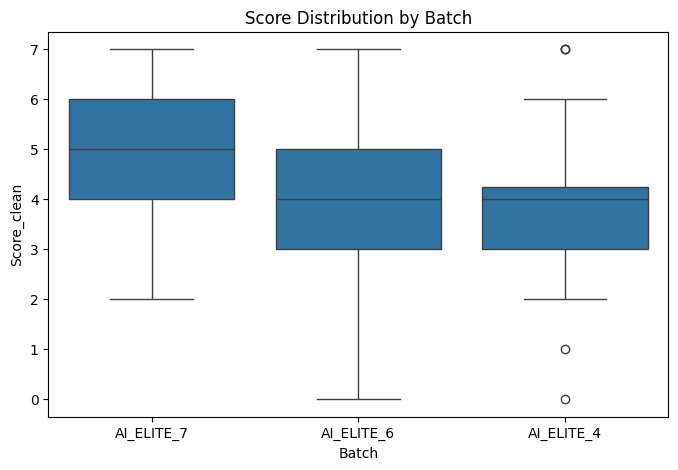

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Batch', y='Score_clean')
plt.title("Score Distribution by Batch")
plt.show()


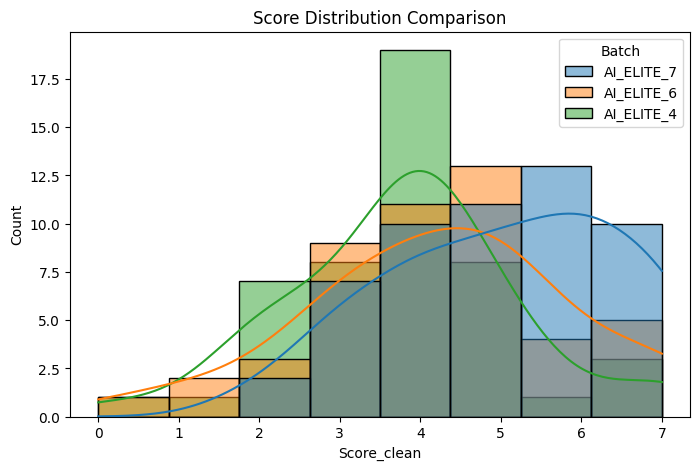

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Score_clean', hue='Batch', kde=True, bins=8)
plt.title("Score Distribution Comparison")
plt.show()


In [29]:
def categorize(score):
    if score <=2:
        return 'Low'
    elif score <=5:
        return 'Average'
    else:
        return 'High'

df['Performance_Level'] = df['Score_clean'].apply(categorize)

df['Performance_Level'].value_counts()
df.groupby('Batch')['Performance_Level'].value_counts()


Batch       Performance_Level
AI_ELITE_4  Average              35
            Low                   9
            High                  4
AI_ELITE_6  Average              33
            High                  9
            Low                   6
AI_ELITE_7  Average              28
            High                 23
            Low                   2
Name: count, dtype: int64

#Insights

Students are performing moderately well (average score around 4.4 out of 7).

Performance is not the same across all batches. Some batches do much better than others.

#Best Performing Batch — AI_ELITE_7

Students in this batch generally understand concepts well

Scores are higher and more consistent

Very few weak students

# Needs Attention — AI_ELITE_6

Performance is mixed

Some students score well

But some students are weak

Needs extra help for struggling students

##Weakest Batch — AI_ELITE_4

Lowest average score

Very few top scorers

More low-scoring students

Needs strong support and special training